# K-means clustering - Mall Customers data

<!-- By Jibin K -->

## Task:

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
# Importing required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

## Display the basic info

In [3]:
# Data shape - row and column
df.shape

(200, 5)

In [4]:
# Data head - first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Data summary
df.describe(include=df.dtypes.to_list()).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


In [7]:
# Checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

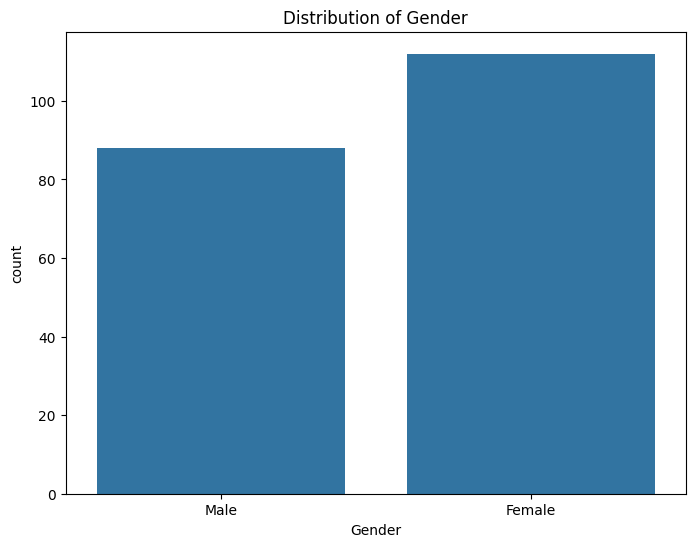

In [8]:
# Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender',data = df)
plt.title('Distribution of Gender')
plt.show()

## Select relevant features for clustering and Kmeans cluster

In [9]:
# Using Annual Income and Spending Score for segmentation
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# Data Preprocessing (Feature Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

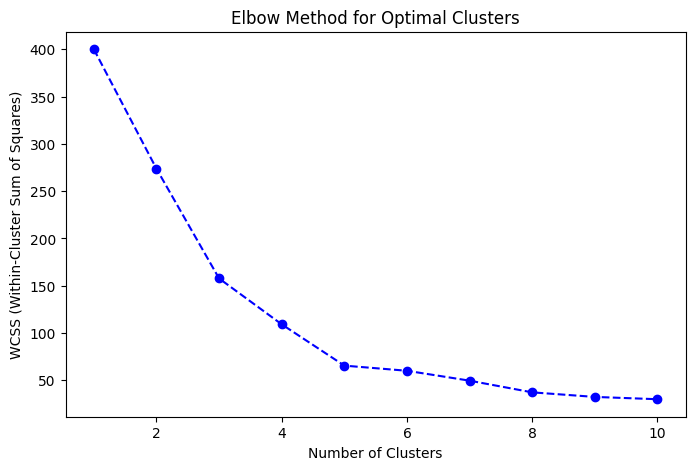

In [12]:
#  Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

The optimal number of clusters(k) is typically at the point where the inertia curvestarts to bend (the "elbow"). Based on the plot, it looks like the optimal k is around 5.

# Apply K-Means with optimal clusters

In [13]:
# Apply K-Means with optimal clusters 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

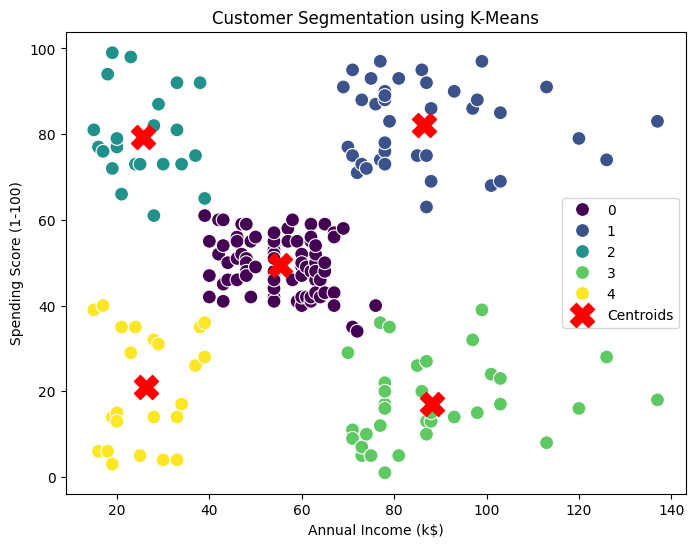

In [14]:
# Visualizing Customer Segments
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df['Cluster'], palette="viridis", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=300, c='red', marker='X', label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()